<a href="https://colab.research.google.com/github/jlcamelo2350/Dados-e-automacao/blob/main/weg%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carrego as bibliotecas que utilizarei:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime as datetime

In [17]:
def dados_preçosweg():
    # Definir o intervalo de datas: de 01/01/2019 até 27/01/2024.
    start = datetime.datetime(2019, 1, 1)
    end = datetime.datetime(2024, 4, 27 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento para cada empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Resetar o índice para incluir a coluna de datas no DataFrame
    df.reset_index(inplace=True)
    return df

[*********************100%%**********************]  1 of 1 completed


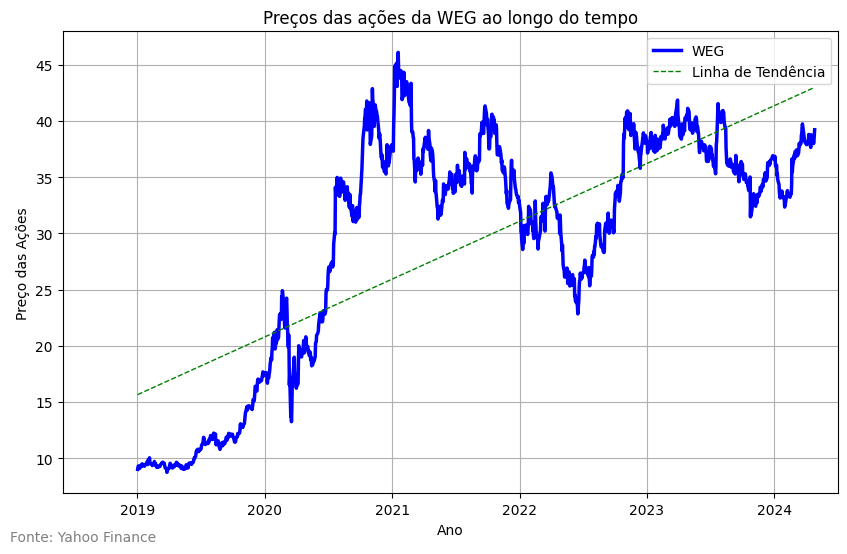

In [23]:
# Obter os dados
df = dados_preçosweg()

# Criar uma coluna de data a partir da coluna 'Date'
df['data'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
plt.plot(df.index, df['WEGE3'], label='WEG', color='blue', linewidth=2.5)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 1)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência', color='green', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2018-06-01'), pd.Timestamp('2024-07-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2018-01-01'), df['WEGE3'].min() * 0.3, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()
